*This explicitly shows how the Quantum Fourier Transformation works, we can explicitly make our own QFT in the reverse order(for simplicity) and swap the qubits in the end*

In [2]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.circuit.library import QFT
import matplotlib.pyplot as plt

QFT Circuit with swap gates for reversing:


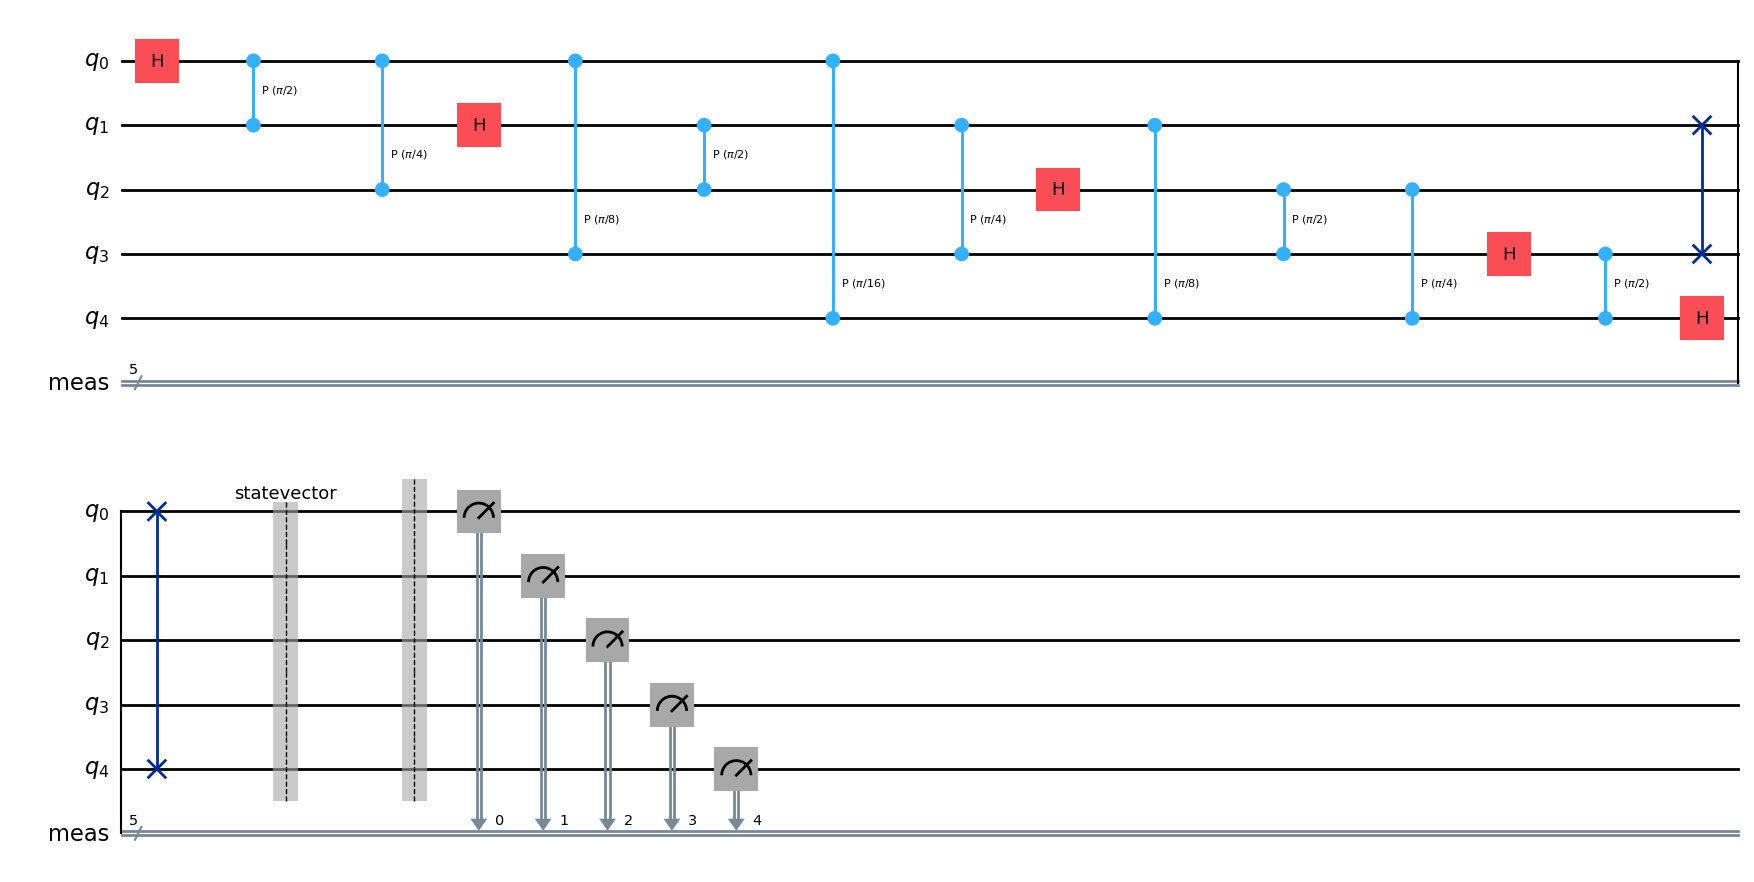


Measurement Results:


<BarContainer object of 32 artists>

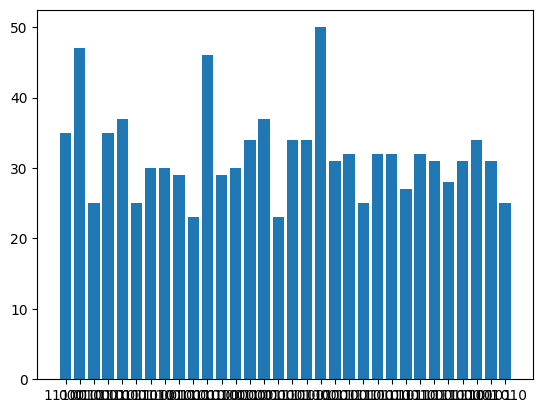

In [4]:
import numpy as np
from qiskit_aer import AerSimulator


def myQFT(nqubits):
    qc = QuantumCircuit(nqubits)
    pi = np.pi
    # Apply QFT gates in order (0 to n-1)
    for qubit in range(nqubits):
        qc.h(qubit)
        for otherqubit in range(qubit + 1, nqubits):
            qc.cp(pi / (2**(otherqubit - qubit)), otherqubit, qubit)
    # Add swap gates to reverse qubit order
    for qubit in range(nqubits // 2):
        qc.swap(qubit, nqubits - qubit - 1)
    return qc

# Example usage for 5 qubits
n = 5
qft_circuit = myQFT(n)
qft_circuit.save_statevector()  # Save statevector for later analysis
qft_circuit.measure_all()
print("QFT Circuit with swap gates for reversing:")
display(qft_circuit.draw('mpl'))  # Display circuit diagram with swaps

# Simulate and visualize results
simulator = AerSimulator()
job = simulator.run(qft_circuit, shots=1024)
result = job.result()
counts = result.get_counts()
print("\nMeasurement Results:")



plt.bar(counts.keys(), counts.values())

